In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (6, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

Use the APOGEE DR17 sample from my paper with Leung et al. (2023) ages.

In [3]:
sample = pd.read_csv(Path('../data/sample.csv'))
sample

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,O_FE,O_FE_ERR,LATENT_AGE,LATENT_AGE_ERR,LOG_LATENT_AGE,LOG_LATENT_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,0.023554,-0.160280,0.006890,0.113698,0.023433,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,0.035517,-0.509530,0.011012,0.185943,0.039313,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,0.024334,-0.075011,0.008396,0.027783,0.016560,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,0.029259,-0.139290,0.009310,0.087976,0.033478,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,0.026512,-0.082189,0.009157,0.043742,0.020672,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192985,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,0.030519,-0.408670,0.009130,-0.031660,0.032894,NaN,NaN,NaN,NaN
192986,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,0.026187,-0.504450,0.009010,0.287303,0.012854,NaN,NaN,NaN,NaN
192987,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,0.034748,-0.333100,0.011422,0.130718,0.037808,NaN,NaN,NaN,NaN
192988,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,0.024013,-0.236560,0.007337,0.088913,0.019459,NaN,NaN,NaN,NaN


In [4]:
# Limit to stars with ages
sample = sample[pd.notna(sample['LATENT_AGE'])].copy()
sample

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,O_FE,O_FE_ERR,LATENT_AGE,LATENT_AGE_ERR,LOG_LATENT_AGE,LOG_LATENT_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.745940,5031.2637,10.145057,3.456132,0.023554,-0.160280,0.006890,0.113698,0.023433,3.713866,1.315107,0.569826,0.138561
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.407490,5049.7686,14.194268,3.291666,0.029259,-0.139290,0.009310,0.087976,0.033478,1.241603,0.066435,0.093983,0.031293
6,2M00000535+1504343,0.022311,15.076210,8.381313,174.422544,-0.851532,162.739610,4914.6753,10.838367,3.300559,0.025471,-0.087559,0.008191,0.101433,0.023082,4.828175,1.366519,0.683783,0.143478
10,2M00000866+7122144,0.036099,71.370689,8.704496,173.650654,0.194404,491.906160,4669.0810,7.625217,2.527280,0.022586,-0.134600,0.007464,0.063030,0.014514,6.893998,2.467813,0.838471,0.145866
11,2M00000940+5515185,0.039186,55.255161,8.913970,170.865002,-0.166995,298.020840,4892.9210,9.005555,2.624027,0.022747,-0.110240,0.007019,0.078617,0.018903,2.225678,0.201302,0.347462,0.041407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192975,2M23595371+8506304,359.973792,85.108459,9.151392,170.735256,0.735716,159.313220,5092.2430,12.708504,3.379881,0.026450,-0.112140,0.008028,0.088694,0.030328,2.848126,0.609402,0.454559,0.114833
192977,2M23595481+7509560,359.978414,75.165581,8.616469,174.634896,0.229559,498.815370,4824.3516,9.166178,2.718271,0.025805,-0.395240,0.007764,0.189403,0.020430,6.429371,2.465394,0.808168,0.182784
192978,2M23595490+5704387,359.978770,57.077431,8.585246,174.234470,-0.063616,585.913000,5015.4077,9.502117,2.892750,0.021294,0.050932,0.006490,-0.115146,0.020192,0.822008,0.116917,-0.085124,0.061572
192983,2M23595553+6339020,359.981416,63.650566,10.086408,162.964682,0.102936,106.809425,5003.4780,14.522411,2.998743,0.028739,0.042468,0.009845,-0.005199,0.031410,0.884344,0.187022,-0.053379,0.109809


In [12]:
def box_smooth(hist, bins, width):
    """
    Box-car smoothing function for a pre-generated histogram.

    Parameters
    ----------
    bins : array-like
        Bins dividing the histogram, including the end. Length must be 1 more
        than the length of hist, and bins must be evenly spaced.
    hist : array-like
        Histogram of data
    width : float
        Width of the box-car smoothing function in data units
    """
    bin_width = bins[1] - bins[0]
    box_width = int(width / bin_width)
    box = np.ones(box_width) / box_width
    hist_smooth = np.convolve(hist, box, mode='same')
    return hist_smooth

Divide the sample in bins of age and (present-day) Galactocentric radius.

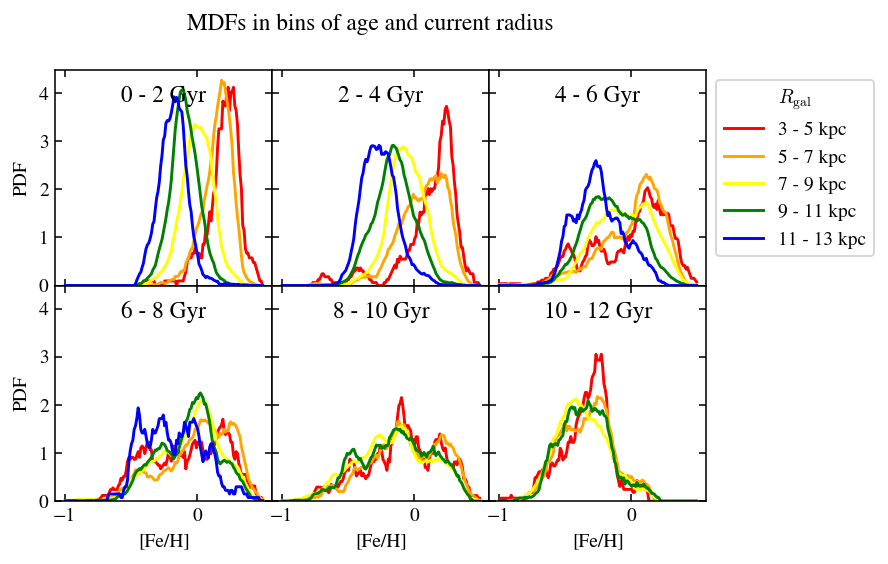

In [61]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.)

mdf_bins = np.arange(-1., 0.51, 0.01)
mdf_bin_centers = (mdf_bins[1:] + mdf_bins[:-1]) / 2

age_bins = [0, 2, 4, 6, 8, 10, 12]
for j, ax in enumerate(axs.flatten()):
    age_lim = (age_bins[j], age_bins[j+1])
    galr_bins = [3, 5, 7, 9, 11, 13]
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for i in range(len(galr_bins)-1):
        galr_lim = (galr_bins[i], galr_bins[i+1])
        subset = sample[(sample['GALR'] >= galr_lim[0]) &
                        (sample['GALR'] < galr_lim[1]) &
                        (sample['LATENT_AGE'] >= age_lim[0]) &
                        (sample['LATENT_AGE'] < age_lim[1])]
        if subset.shape[0] > 100:
            mdf, bin_edges = np.histogram(subset['FE_H'], bins=mdf_bins, density=True)
            mdf_smooth = box_smooth(mdf, bin_edges, 0.1)
            ax.plot(mdf_bin_centers, mdf_smooth, label='%s - %s kpc' % galr_lim, color=colors[i])
            ax.set_title('%s - %s Gyr' % age_lim, pad=0, y=0.85)

axs[0,-1].legend(loc='upper left', bbox_to_anchor=(1, 1), title=r'$R_{\rm gal}$')
for ax in axs[1]:
    ax.set_xlabel('[Fe/H]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[0,0].set_ylim((0, None))
fig.suptitle('MDFs in bins of age and current radius')

plt.show()

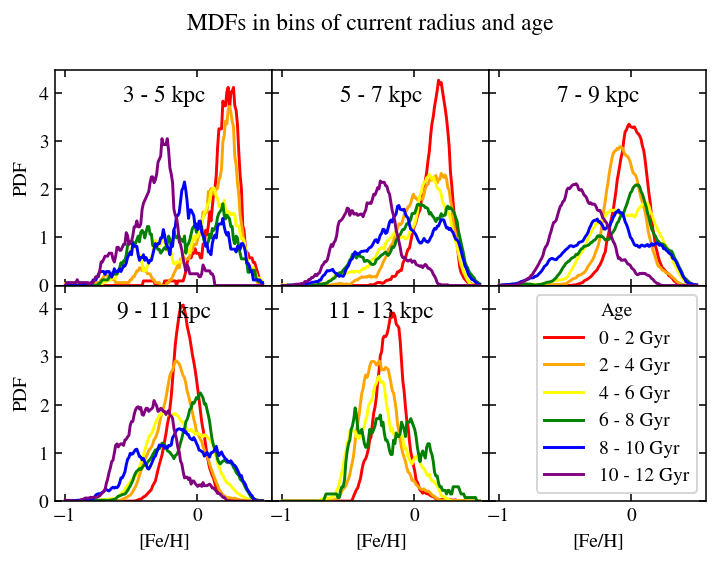

In [60]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
plt.subplots_adjust(wspace=0., hspace=0.)

mdf_bins = np.arange(-1., 0.51, 0.01)
mdf_bin_centers = (mdf_bins[1:] + mdf_bins[:-1]) / 2

age_bins = [0, 2, 4, 6, 8, 10, 12]
galr_bins = [3, 5, 7, 9, 11, 13]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for j, ax in enumerate(axs.flatten()[:-1]):
    galr_lim = (galr_bins[j], galr_bins[j+1])
    for i in range(len(age_bins)-1):
        age_lim = (age_bins[i], age_bins[i+1])
        subset = sample[(sample['GALR'] >= galr_lim[0]) &
                        (sample['GALR'] < galr_lim[1]) &
                        (sample['LATENT_AGE'] >= age_lim[0]) &
                        (sample['LATENT_AGE'] < age_lim[1])]
        if subset.shape[0] > 100:
            mdf, bin_edges = np.histogram(subset['FE_H'], bins=mdf_bins, density=True)
            mdf_smooth = box_smooth(mdf, bin_edges, 0.1)
            ax.plot(mdf_bin_centers, mdf_smooth, label='%s - %s Gyr' % age_lim, color=colors[i])
            ax.set_title('%s - %s kpc' % galr_lim, pad=0, y=0.85)

h, l = axs[0,-1].get_legend_handles_labels()
axs[1,-1].legend(h, l, loc='upper right', title='Age')
for ax in axs[1]:
    ax.set_xlabel('[Fe/H]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')
axs[0,0].set_ylim((0, None))
fig.suptitle('MDFs in bins of current radius and age')

plt.show()

In each age bin, plot the mode of the MDF as a function of Galactocentric radius. I also plot the mode of all stars with ages < 8 Gyr as the black points, and I fit a line to those points (black dashed). Note that the size of the radial bins can make a big difference to the mode for bins with few stars.

-0.0631515151515152 0.5142121212121223


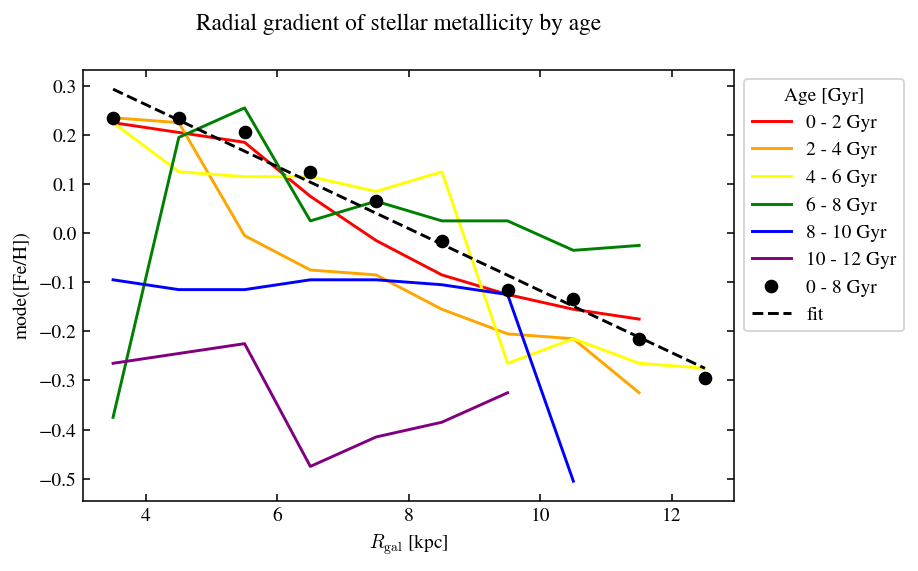

In [64]:
fig, ax = plt.subplots()

mdf_bins = np.arange(-1., 0.51, 0.01)
mdf_bin_centers = (mdf_bins[1:] + mdf_bins[:-1]) / 2

age_bins = np.arange(0, 14, 2)
age_bin_centers = (age_bins[1:] + age_bins[:-1]) / 2
galr_bins = np.arange(3, 14, 1)
galr_bin_centers = (galr_bins[1:] + galr_bins[:-1]) / 2
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for j in range(len(age_bins) - 1):
    age_lim = (age_bins[j], age_bins[j+1])
    modes = []
    for i in range(len(galr_bins)-1):
        galr_lim = (galr_bins[i], galr_bins[i+1])
        subset = sample[(sample['GALR'] >= galr_lim[0]) &
                        (sample['GALR'] < galr_lim[1]) &
                        (sample['LATENT_AGE'] >= age_lim[0]) &
                        (sample['LATENT_AGE'] < age_lim[1])]
        if subset.shape[0] > 50:
            mdf, bin_edges = np.histogram(subset['FE_H'], bins=mdf_bins, density=True)
            mdf_smooth = box_smooth(mdf, bin_edges, 0.1)
            # calculate the mode
            modes.append(mdf_bin_centers[np.argmax(mdf_smooth)])
    ax.plot(galr_bin_centers[:len(modes)], modes, color=colors[j], label='%s - %s Gyr' % age_lim)

# Best fit for <8 Gyr stars
age_lim = (0, 8)
modes = []
for i in range(len(galr_bins)-1):
    galr_lim = (galr_bins[i], galr_bins[i+1])
    subset = sample[(sample['GALR'] >= galr_lim[0]) &
                    (sample['GALR'] < galr_lim[1]) &
                    (sample['LATENT_AGE'] >= age_lim[0]) &
                    (sample['LATENT_AGE'] < age_lim[1])]
    mdf, bin_edges = np.histogram(subset['FE_H'], bins=mdf_bins, density=True)
    mdf_smooth = box_smooth(mdf, bin_edges, 0.1)
    # calculate the mode
    modes.append(mdf_bin_centers[np.argmax(mdf_smooth)])
A = np.vstack([galr_bin_centers, np.ones(len(galr_bin_centers))]).T
m, c = np.linalg.lstsq(A, np.array(modes), rcond=None)[0]
print(m, c)
ax.plot(galr_bin_centers, modes, 'ko', label='%s - %s Gyr' % age_lim)
ax.plot(galr_bin_centers, m * galr_bin_centers + c, 'k--', label='fit')

ax.set_xlabel(r'$R_{\rm gal}$ [kpc]')
ax.set_ylabel('mode([Fe/H])')
ax.legend(title='Age [Gyr]', loc='upper left', bbox_to_anchor=(1, 1))
fig.suptitle('Radial gradient of stellar metallicity by age')

plt.show()

Take the dashed line from above as the (constant) radial metallicity gradient over the past 8 Gyr. A star's metallicity then directly traces its birth radius, so calculate the birth radius for all stars with ages < 8 Gyr.

In [7]:
young_sample = sample[sample['LATENT_AGE'] <= 8.].copy()
slope = -0.063
intercept = 0.514
young_sample['GALR_BIRTH'] = (young_sample['FE_H'] - intercept) / slope
young_sample['DELTA_R'] = young_sample['GALR'] - young_sample['GALR_BIRTH']

Histograms of radial migration distance $\Delta R_{\rm gal}$ as a function of stellar age. The histograms generally get wider and more skewed to positive $\Delta R$ for older stars. There is an interesting small shift in the modes to negative $\Delta R$ for stars between ages of 2 - 5 Gyr.

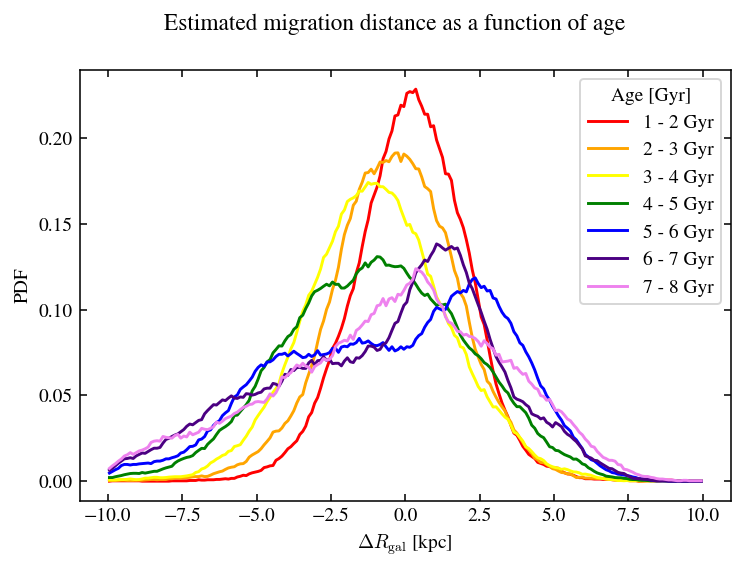

In [22]:
fig, ax = plt.subplots()

dr_bins = np.arange(-10, 10.1, 0.1)
dr_bin_centers = (dr_bins[:-1] + dr_bins[1:]) / 2
age_bins = np.arange(1, 9, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
for i in range(len(age_bins) - 1):
    age_lim = (age_bins[i], age_bins[i+1])
    subset = young_sample[(young_sample['LATENT_AGE'] >= age_lim[0]) &
                          (young_sample['LATENT_AGE'] < age_lim[1])].copy()
    hist, bin_edges = np.histogram(subset['DELTA_R'], bins=dr_bins, density=True)
    hist_smooth = box_smooth(hist, bin_edges, 1.)
    ax.plot(dr_bin_centers, hist_smooth, color=colors[i], label='%s - %s Gyr' % age_lim)

ax.legend(title='Age [Gyr]')
ax.set_xlabel(r'$\Delta R_{\rm gal}$ [kpc]')
ax.set_ylabel('PDF')
fig.suptitle('Estimated migration distance as a function of age')

plt.show()

Plot the migration distance distributions of stars which were born in the inner galaxy, Solar neighborhood, and outer galaxy, as a function of age. These will be skewed by the survey selection function. Out of stars born in the inner Galaxy, we're more likely to see those which migrated outward and ended up closer to the Sun. Similarly, out of stars born in the outer Galaxy, we're more likely to see those which migrated inward.

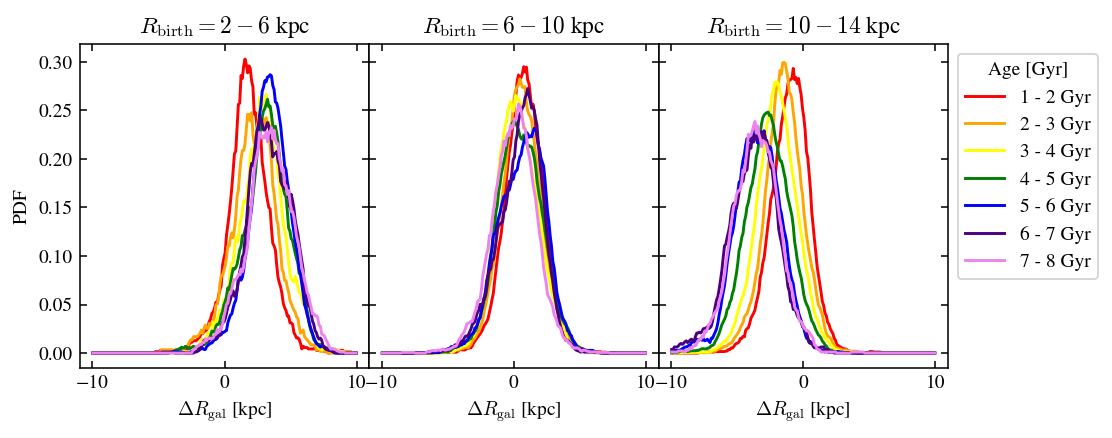

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)

dr_bins = np.arange(-10, 10.1, 0.1)
dr_bin_centers = (dr_bins[:-1] + dr_bins[1:]) / 2
age_bins = np.arange(1, 9, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
galr_bins = [2, 6, 10, 14]

for j, ax in enumerate(axs):
    galr_lim = (galr_bins[j], galr_bins[j+1])
    ax.set_title(r'$R_{\rm birth} = %s - %s$ kpc' % galr_lim)
    for i in range(len(age_bins) - 1):
        age_lim = (age_bins[i], age_bins[i+1])
        subset = young_sample[(young_sample['LATENT_AGE'] >= age_lim[0]) &
                              (young_sample['LATENT_AGE'] < age_lim[1]) &
                              (young_sample['GALR_BIRTH'] >= galr_lim[0]) &
                              (young_sample['GALR_BIRTH'] < galr_lim[1])].copy()
        hist, bin_edges = np.histogram(subset['DELTA_R'], bins=dr_bins, density=True)
        hist_smooth = box_smooth(hist, bin_edges, 1.)
        ax.plot(dr_bin_centers, hist_smooth, color=colors[i], label='%s - %s Gyr' % age_lim)

axs[-1].legend(title='Age [Gyr]', loc='upper left', bbox_to_anchor=(1, 1))
for ax in axs:
    ax.set_xlabel(r'$\Delta R_{\rm gal}$ [kpc]')
axs[0].set_ylabel('PDF')

plt.show()

Plot the age distributions of stars in bins of birth radius. Inner galaxy stars appear generally older than outer galaxy stars, which is a good sign.

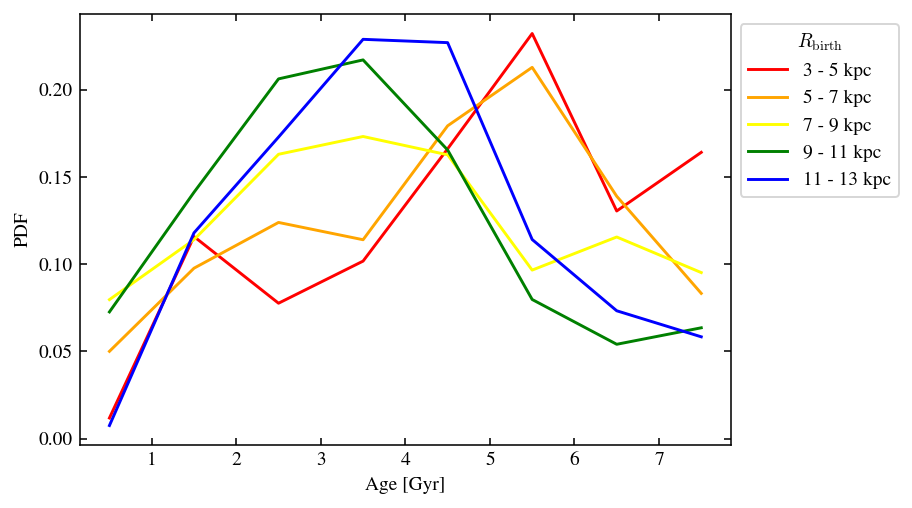

In [75]:
fig, ax = plt.subplots()

age_bins = np.arange(9)
galr_bins = [3, 5, 7, 9, 11, 13]
colors = ['red', 'orange', 'yellow', 'green', 'blue']

for i in range(len(galr_bins) -1):
    galr_lim = (galr_bins[i], galr_bins[i+1])
    subset = young_sample[(young_sample['GALR_BIRTH'] >= galr_lim[0]) &
                          (young_sample['GALR_BIRTH'] < galr_lim[1])].copy()
    hist, bin_edges = np.histogram(subset['LATENT_AGE'], density=True, bins=age_bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax.plot(bin_centers, hist, color=colors[i], label='%s - %s kpc' % galr_lim)
#     ax.hist(subset['LATENT_AGE'], density=True, bins=age_bins, color=colors[i], histtype='step',
#             label='%s - %s kpc' % galr_lim)

ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('PDF')
ax.legend(title=r'$R_{\rm birth}$', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

2D histogram of stellar age vs birth radius. Note that the bin size is much smaller than the expected error on age and especially birth radius, so don't put much weight on any fine structure you see.

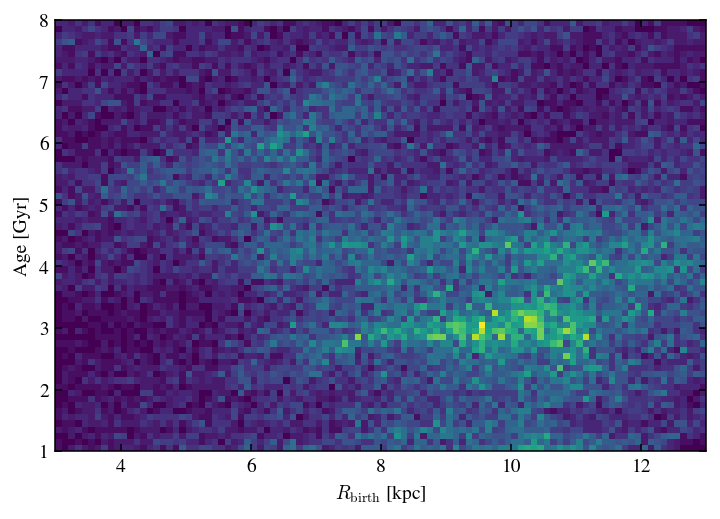

In [26]:
fig, ax = plt.subplots()

age_bins = np.arange(1, 8.1, 0.1)
galr_bins = np.arange(3, 13.1, 0.1)

ax.hist2d(young_sample['GALR_BIRTH'], young_sample['LATENT_AGE'], bins=[galr_bins, age_bins])

ax.set_xlabel(r'$R_{\rm birth}$ [kpc]')
ax.set_ylabel('Age [Gyr]')
plt.show()

Similar to above, but column-normalized. There is an interesting trend among stars with birth radii between 3 - 7 kpc where stars appear to get *older* on average at larger radii, opposite what I would expect. Then there's a break at 7 kpc and the average age for stars born outside that radius is fairly constant with radius.

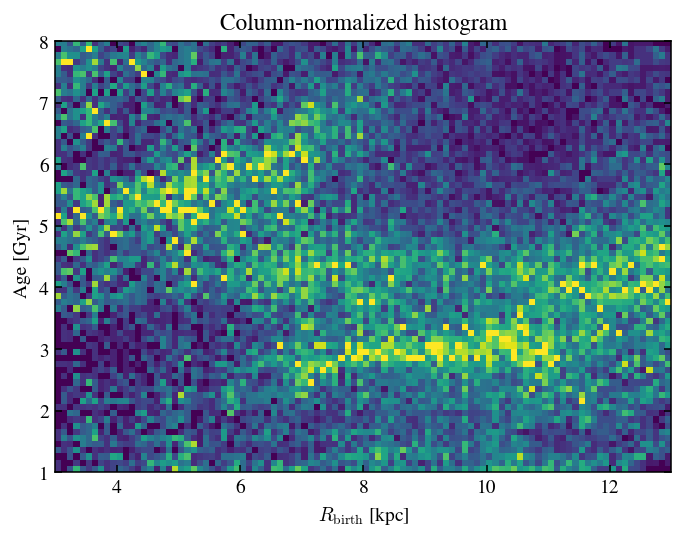

In [44]:
age_bins = np.arange(1, 8.1, 0.1)
galr_bins = np.arange(3, 13.1, 0.1)
H, xedges, yedges = np.histogram2d(young_sample['GALR_BIRTH'], young_sample['LATENT_AGE'],
                                   bins=[galr_bins, age_bins])
# colsum = np.sum(H, axis=1)
# colsum2d = np.reshape(np.repeat(colsum, repeats=H.shape[1]), H.shape)
# H_colnorm = H / colsum2d
colmax = np.max(H, axis=1)
colmax2d = np.reshape(np.repeat(colmax, repeats=H.shape[1]), H.shape)
H_colnorm = H / colmax2d

fig, ax = plt.subplots()
ax.imshow(H_colnorm.T, origin='lower', extent=(galr_bins[0], galr_bins[-1], age_bins[0], age_bins[-1]))
ax.set_xlabel(r'$R_{\rm birth}$ [kpc]')
ax.set_ylabel('Age [Gyr]')
ax.set_title('Column-normalized histogram')
plt.show()